# Imported necessary packages and libraries

In [125]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import math
import seaborn as sns
import statsmodels.api as sm
import warnings
import statistics
from statsmodels.graphics.tsaplots import plot_acf
import scipy.stats as stats
from arch.unitroot import VarianceRatio
from arch.unitroot import ADF
import itertools
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error as mae
warnings.filterwarnings('ignore')


# QUESTION 1

In [2]:
# dataset reading
wind_data = pd.read_csv('WindGeneration.csv')
wind_data

,Date,Time,Wind Generation
0,01/01/2014,1,1190.1
1,01/01/2014,2,1186.6
2,01/01/2014,3,1174.3
3,01/01/2014,4,1146.7
4,01/01/2014,5,1156.8
...,...,...,...
8755,31/12/2014,20,996.8
8756,31/12/2014,21,1031.8
8757,31/12/2014,22,1218.0
8758,31/12/2014,23,1312.1


In [3]:
# getting the necessary information obout the dataset
wind_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             8760 non-null   object 
 1   Time             8760 non-null   int64  
 2   Wind Generation  8759 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 205.4+ KB


In [4]:
#date format is changed from object to datetime and also the timestamps is generated
wind_data['Date']=pd.to_datetime(wind_data['Date'], format = "%d/%m/%Y")
wind_data
wind_data['Date']=wind_data['Date']+pd.to_timedelta(wind_data['Time'],unit='h')

# Filling the missing values using interpolation
wind_data = wind_data.interpolate(method ='linear', limit_direction ='forward')
wind_data

,Date,Time,Wind Generation
0,2014-01-01 01:00:00,1,1190.1
1,2014-01-01 02:00:00,2,1186.6
2,2014-01-01 03:00:00,3,1174.3
3,2014-01-01 04:00:00,4,1146.7
4,2014-01-01 05:00:00,5,1156.8
...,...,...,...
8755,2014-12-31 20:00:00,20,996.8
8756,2014-12-31 21:00:00,21,1031.8
8757,2014-12-31 22:00:00,22,1218.0
8758,2014-12-31 23:00:00,23,1312.1


In [5]:
#the new information checking shows that the date formate is datetime
wind_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             8760 non-null   datetime64[ns]
 1   Time             8760 non-null   int64         
 2   Wind Generation  8760 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 205.4 KB


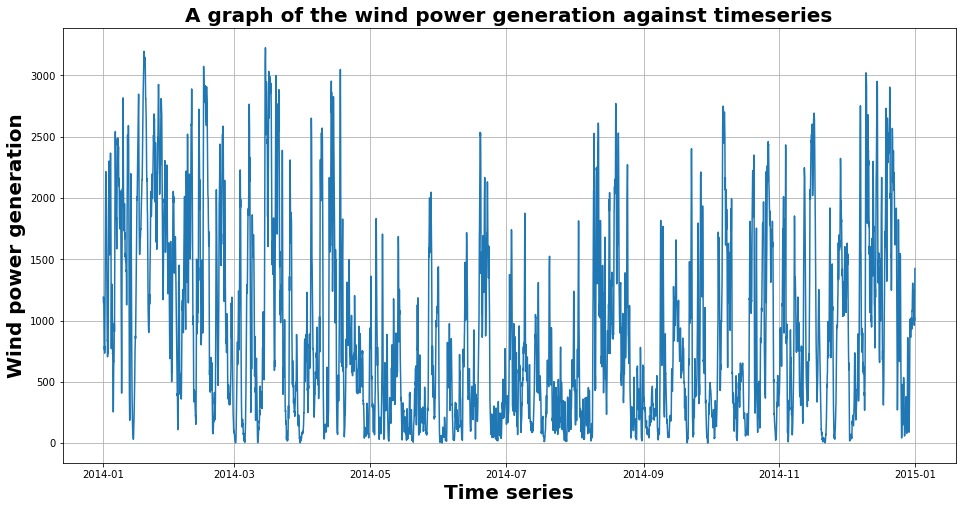

In [133]:
#plotting stage, we plot the the times series against the wind power generation
#figuringb the size of the figure
plt.figure (figsize=(16,8))
sns.lineplot(wind_data["Date"], wind_data["Wind Generation"]) # plotting using sns.lineplot
#adding the title to the graph
plt.title('A graph of the wind power generation against timeseries',color="black",fontsize=20,fontweight="bold")
#adding x_label to the graph
plt.xlabel('Time series',color="black",fontsize=20,fontweight="bold")
#adding the y_label
plt.ylabel('Wind power generation',color="black",fontsize=20,fontweight="bold")
#adding grid
plt.grid()
# showing the plotted graph
plt.show()

In [134]:
#setting date as index, Daily sampling and calculation of the mean
wind_data1=wind_data.set_index('Date').resample('D').mean()
wind_data1

,Time,Wind Generation
Date,,
2014-01-01,12.0,1064.878261
2014-01-02,12.5,1594.850000
2014-01-03,12.5,1543.333333
2014-01-04,12.5,1644.262500
2014-01-05,12.5,683.229167
...,...,...
2014-12-28,12.5,378.591667
2014-12-29,12.5,509.945833
2014-12-30,12.5,1018.108333


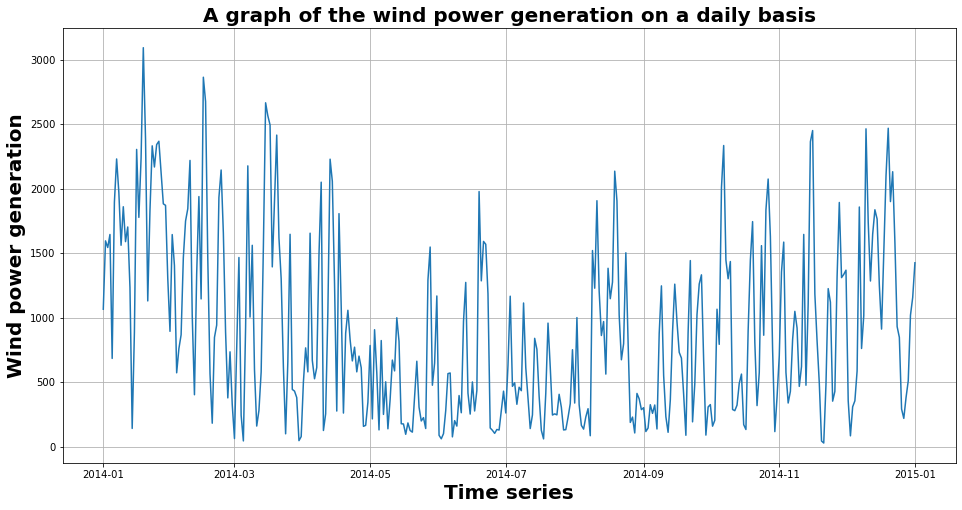

In [9]:
#figuring the size of the graph
plt.figure (figsize=(16,8))
#plotting using the sns.lineplot
sns.lineplot(wind_data1.index, wind_data1["Wind Generation"])
#adding title t the graph
plt.title('A graph of the wind power generation on a daily basis',color="black",fontsize=20,fontweight="bold")
#adding x_label to the plot
plt.xlabel('Time series',color="black",fontsize=20,fontweight="bold")
#adding the y_label to the plot
plt.ylabel('Wind power generation',color="black",fontsize=20,fontweight="bold")
#adding grid to the plot
plt.grid()
#showing the graph
plt.show()

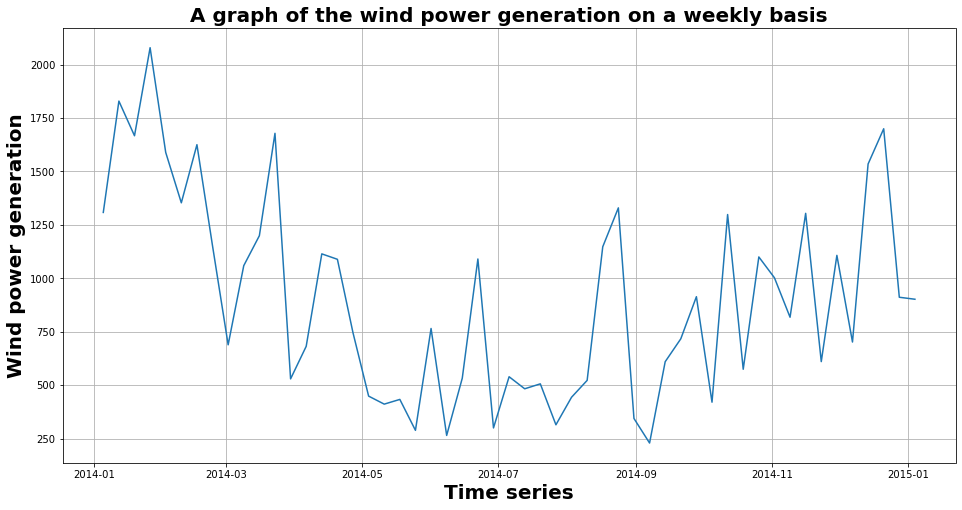

In [10]:
#setting the date as index, resampling on weekly basis and calculation of the mean
wind_data2 = wind_data.set_index('Date').resample('W').mean()
#figuring size of the graph
plt.figure (figsize=(16,8))
#plotting using sns.lineplot
sns.lineplot(wind_data2.index, wind_data2["Wind Generation"])
#adding title to the graph
plt.title('A graph of the wind power generation on a weekly basis',color="black",fontsize=20,fontweight="bold")
#adding the x_label
plt.xlabel('Time series',color="black",fontsize=20,fontweight="bold")
#adding the y_label
plt.ylabel('Wind power generation',color="black",fontsize=20,fontweight="bold")
#adding the grid lines
plt.grid()
#showing the graph
plt.show()

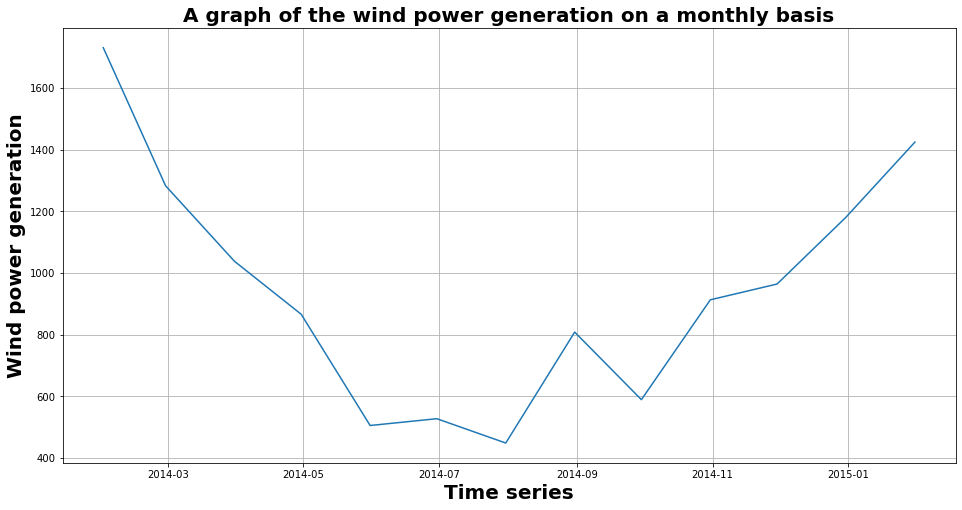

In [11]:
#setting date as index, resampling on monthly basis and calcualtion of the mean
wind_data3=wind_data.set_index('Date').resample('M').mean()
#figuring the size of the plot
plt.figure (figsize=(16,8))
#plotting using the sns.lineplot
sns.lineplot(wind_data3.index, wind_data3["Wind Generation"])
#adding the title to the graph
plt.title('A graph of the wind power generation on a monthly basis',color="black",fontsize=20,fontweight="bold")
#adding the x_label to the graph
plt.xlabel('Time series',color="black",fontsize=20,fontweight="bold")
#adding the y_label to the graph
plt.ylabel('Wind power generation',color="black",fontsize=20,fontweight="bold")
#adding gridlines
plt.grid()
#showing the graph of the plot
plt.show()

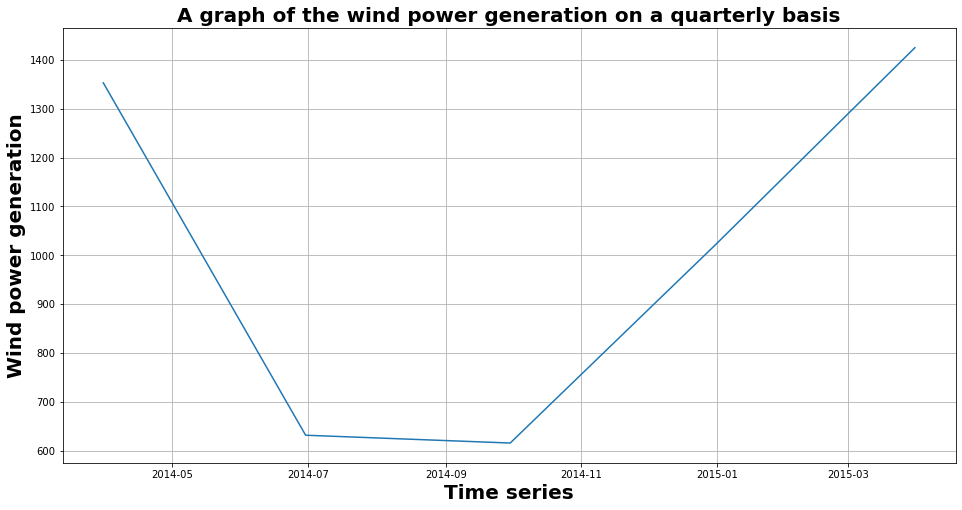

In [12]:
#setting the date as index, resampling on a quarterly basis and calculatio of the mean
wind_data3=wind_data.set_index('Date').resample('Q').mean()
#figuring the size of the plot
plt.figure (figsize=(16,8))
#plotting the graph using sns.lineplot
sns.lineplot(wind_data3.index, wind_data3["Wind Generation"])
#adding the title to the graph
plt.title('A graph of the wind power generation on a quarterly basis',color="black",fontsize=20,fontweight="bold")
#adding the x_label
plt.xlabel('Time series',color="black",fontsize=20,fontweight="bold")
#adding the y_label
plt.ylabel('Wind power generation',color="black",fontsize=20,fontweight="bold")
#adding the gridlines
plt.grid()
#showing the graph
plt.show()

# QUESTION 2

In [13]:
# we keep on using the wind data
wind_data

,Date,Time,Wind Generation
0,2014-01-01 01:00:00,1,1190.1
1,2014-01-01 02:00:00,2,1186.6
2,2014-01-01 03:00:00,3,1174.3
3,2014-01-01 04:00:00,4,1146.7
4,2014-01-01 05:00:00,5,1156.8
...,...,...,...
8755,2014-12-31 20:00:00,20,996.8
8756,2014-12-31 21:00:00,21,1031.8
8757,2014-12-31 22:00:00,22,1218.0
8758,2014-12-31 23:00:00,23,1312.1


In [14]:
print(len(wind_data["Wind Generation"]))

8760


In [135]:
#calcualtion of the wind generation maximum power
max_power = wind_data["Wind Generation"].max()
#printing of the maximum wind power generation
print("The maximum power is: " ,max_power)

The maximum power is:  3225.4


In [16]:
#creation of a list to store the change in wind generation values
change_in_generation=[]
# finding out of the mchange in generation using the values next to the value minus the value divided by the maximum power
for j in range(1,len(wind_data["Wind Generation"])):
    change_in_generation.append(((((wind_data["Wind Generation"])[j]-(wind_data["Wind Generation"])[j-1])-1)/max_power)*100)
print(len(change_in_generation))

8759


In [17]:
# we drop the first index
wind_data2 = wind_data.drop(index=0)
wind_data2

,Date,Time,Wind Generation
1,2014-01-01 02:00:00,2,1186.6
2,2014-01-01 03:00:00,3,1174.3
3,2014-01-01 04:00:00,4,1146.7
4,2014-01-01 05:00:00,5,1156.8
5,2014-01-01 06:00:00,6,1189.7
...,...,...,...
8755,2014-12-31 20:00:00,20,996.8
8756,2014-12-31 21:00:00,21,1031.8
8757,2014-12-31 22:00:00,22,1218.0
8758,2014-12-31 23:00:00,23,1312.1


In [18]:
#adding the change in wind generationto the existing dataset
wind_data2["Change in generation"]=change_in_generation
wind_data2

,Date,Time,Wind Generation,Change in generation
1,2014-01-01 02:00:00,2,1186.6,-0.139518
2,2014-01-01 03:00:00,3,1174.3,-0.412352
3,2014-01-01 04:00:00,4,1146.7,-0.886712
4,2014-01-01 05:00:00,5,1156.8,0.282136
5,2014-01-01 06:00:00,6,1189.7,0.989025
...,...,...,...,...
8755,2014-12-31 20:00:00,20,996.8,-0.967322
8756,2014-12-31 21:00:00,21,1031.8,1.054133
8757,2014-12-31 22:00:00,22,1218.0,5.741923
8758,2014-12-31 23:00:00,23,1312.1,2.886464


In [136]:
# to show the table containing the change in wind generation we need to drop the column of the wind generation
wind_data3=wind_data2.drop(["Wind Generation"], axis=1)
wind_data3

,Date,Time,Change in generation
1,2014-01-01 02:00:00,2,-0.139518
2,2014-01-01 03:00:00,3,-0.412352
3,2014-01-01 04:00:00,4,-0.886712
4,2014-01-01 05:00:00,5,0.282136
5,2014-01-01 06:00:00,6,0.989025
...,...,...,...
8755,2014-12-31 20:00:00,20,-0.967322
8756,2014-12-31 21:00:00,21,1.054133
8757,2014-12-31 22:00:00,22,5.741923
8758,2014-12-31 23:00:00,23,2.886464


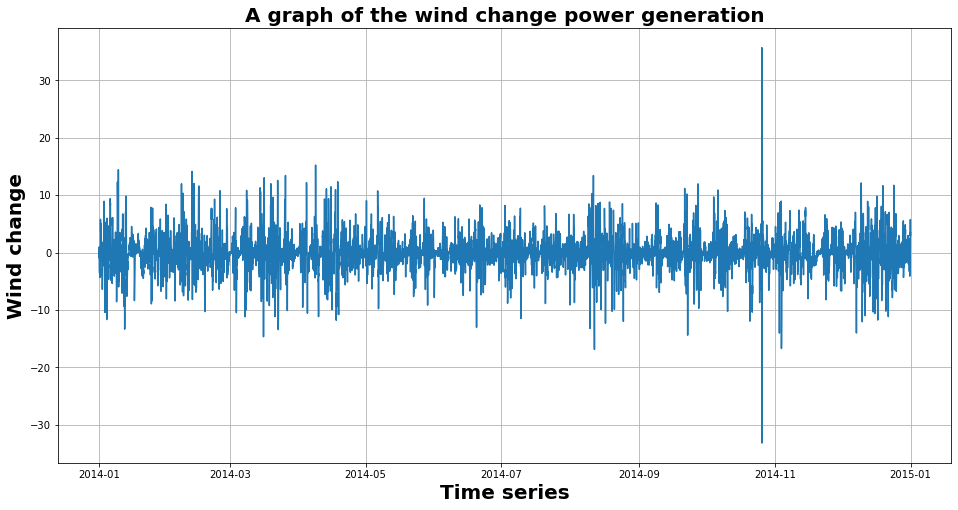

In [20]:
# figuring the size of plot
plt.figure (figsize=(16,8))
#plotting of the graph using sns.lineplot
sns.lineplot(wind_data3["Date"], wind_data3["Change in generation"])
#adding the title to the graph
plt.title('A graph of the wind change power generation',color="black",fontsize=20,fontweight="bold")
#adding the x_label to the plot
plt.xlabel('Time series',color="black",fontsize=20,fontweight="bold")
#adding the y_label to the plot
plt.ylabel('Wind change',color="black",fontsize=20,fontweight="bold")
#adding gridlines
plt.grid()
#showing the graph
plt.show()

In [137]:
#setting the date as index, resampling on a daily basis and calculation of the mean
wind_data_daily=wind_data3.set_index('Date').resample('D').mean()
wind_data_daily

,Time,Change in generation
Date,,
2014-01-01,12.5,0.568781
2014-01-02,12.5,-1.207731
2014-01-03,12.5,1.186158
2014-01-04,12.5,-0.642944
2014-01-05,12.5,-0.399950
...,...,...
2014-12-28,12.5,0.272318
2014-12-29,12.5,0.493350
2014-12-30,12.5,0.418294


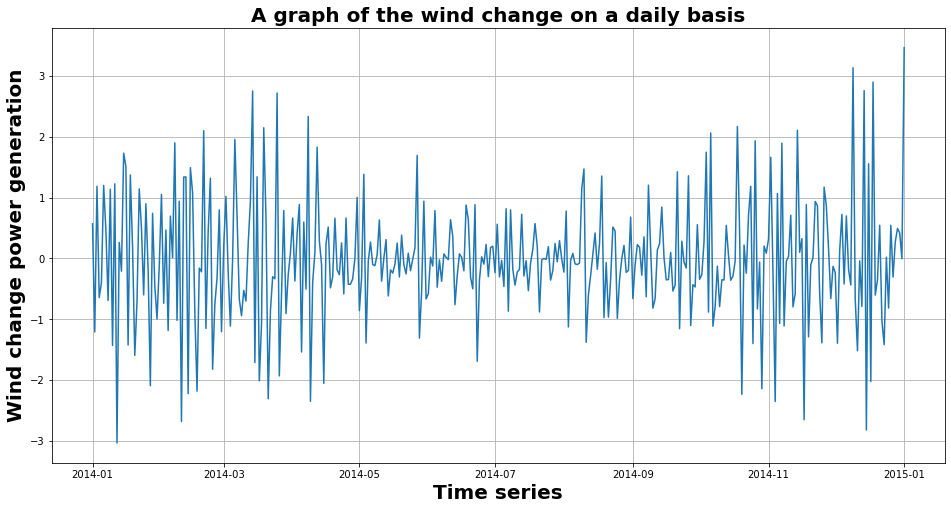

In [22]:
#figuring the size of the plot
plt.figure (figsize=(16,8))
#plotting of the graph using sns.lineplot
sns.lineplot(wind_data_daily.index, wind_data_daily["Change in generation"])
#adding the title to the graph
plt.title('A graph of the wind change on a daily basis',color="black",fontsize=20,fontweight="bold")
#adding the x_label to the plot
plt.xlabel('Time series',color="black",fontsize=20,fontweight="bold")
#adding the y_label to the plot
plt.ylabel('Wind change power generation',color="black",fontsize=20,fontweight="bold")
#adding gridlines
plt.grid()
#showing of the plot
plt.show()

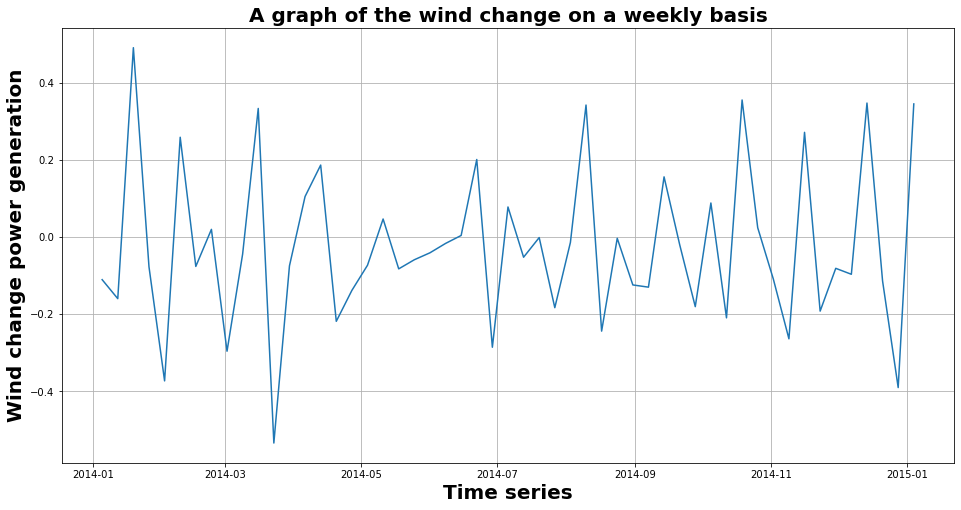

In [23]:
#setting the date as index, resampling on a daily basis and calculation of the mean
wind_data_daily=wind_data3.set_index('Date').resample('W').mean()
#figuring the size of the plot
plt.figure (figsize=(16,8))
#plotting of the graph using sns.lineplot
sns.lineplot(wind_data_daily.index, wind_data_daily["Change in generation"])
#adding the title to the graph
plt.title('A graph of the wind change on a weekly basis',color="black",fontsize=20,fontweight="bold")
#adding the x_label to the plot
plt.xlabel('Time series',color="black",fontsize=20,fontweight="bold")
#adding the y_label to the plot
plt.ylabel('Wind change power generation',color="black",fontsize=20,fontweight="bold")
#adding gridlines
plt.grid()
#showing of the plot
plt.show()

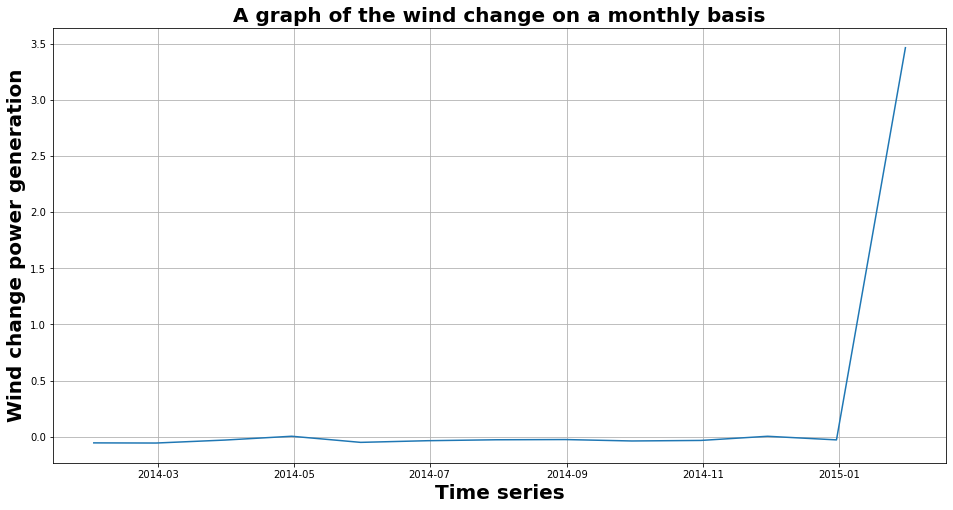

In [24]:
#setting the date as index, resampling on a daily basis and calculation of the mean
wind_data_daily=wind_data3.set_index('Date').resample('M').mean()
#figuring the size of the plot
plt.figure (figsize=(16,8))
#plotting of the graph using sns.lineplot
sns.lineplot(wind_data_daily.index, wind_data_daily["Change in generation"])
#adding the title to the graph
plt.title('A graph of the wind change on a monthly basis',color="black",fontsize=20,fontweight="bold")
#adding the x_label to the plot
plt.xlabel('Time series',color="black",fontsize=20,fontweight="bold")
#adding the y_label to the plot
plt.ylabel('Wind change power generation',color="black",fontsize=20,fontweight="bold")
#adding gridlines
plt.grid()
#showing of the plot
plt.show()

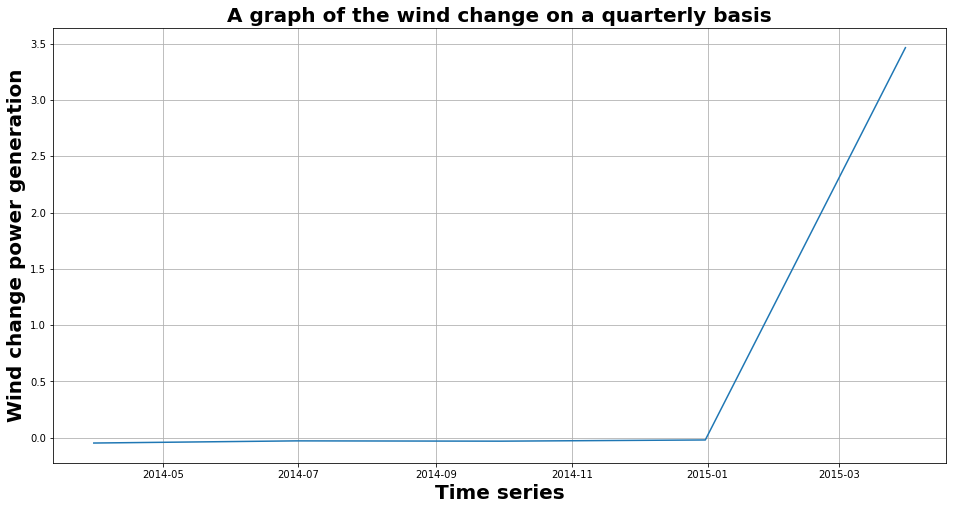

In [25]:
#setting the date as index, resampling on a daily basis and calculation of the mean
wind_data_daily=wind_data3.set_index('Date').resample('Q').mean()
#figuring the size of the plot
plt.figure (figsize=(16,8))
#plotting of the graph using sns.lineplot
sns.lineplot(wind_data_daily.index, wind_data_daily["Change in generation"])
#adding the title to the graph
plt.title('A graph of the wind change on a quarterly basis',color="black",fontsize=20,fontweight="bold")
#adding the x_label to the plot
plt.xlabel('Time series',color="black",fontsize=20,fontweight="bold")
#adding the y_label to the plot
plt.ylabel('Wind change power generation',color="black",fontsize=20,fontweight="bold")
#adding gridlines
plt.grid()
#showing of the plot
plt.show()

# QUESTION 3

In [26]:
# we keep on using the wind data2
wind_data2

,Date,Time,Wind Generation,Change in generation
1,2014-01-01 02:00:00,2,1186.6,-0.139518
2,2014-01-01 03:00:00,3,1174.3,-0.412352
3,2014-01-01 04:00:00,4,1146.7,-0.886712
4,2014-01-01 05:00:00,5,1156.8,0.282136
5,2014-01-01 06:00:00,6,1189.7,0.989025
...,...,...,...,...
8755,2014-12-31 20:00:00,20,996.8,-0.967322
8756,2014-12-31 21:00:00,21,1031.8,1.054133
8757,2014-12-31 22:00:00,22,1218.0,5.741923
8758,2014-12-31 23:00:00,23,1312.1,2.886464


In [27]:
# calculating the positive ramps
for cols in wind_data2.columns.tolist()[1:]:
    positive_ramps = wind_data2[wind_data2[cols] > 0]
positive_ramps

,Date,Time,Wind Generation,Change in generation
4,2014-01-01 05:00:00,5,1156.8,0.282136
5,2014-01-01 06:00:00,6,1189.7,0.989025
13,2014-01-01 14:00:00,14,790.1,0.818503
16,2014-01-01 17:00:00,17,773.7,1.181249
17,2014-01-01 18:00:00,18,927.3,4.731196
...,...,...,...,...
8754,2014-12-31 19:00:00,19,1027.0,0.127116
8756,2014-12-31 21:00:00,21,1031.8,1.054133
8757,2014-12-31 22:00:00,22,1218.0,5.741923
8758,2014-12-31 23:00:00,23,1312.1,2.886464


In [28]:
#sorting the positive ramps on ascending order
sorted_positive_ramps = positive_ramps.sort_values(["Change in generation"], ascending=True)
sorted_positive_ramps

,Date,Time,Wind Generation,Change in generation
1805,2014-03-17 06:00:00,6,2926.0,0.003100
3081,2014-05-09 10:00:00,10,18.7,0.003100
1703,2014-03-13 00:00:00,24,319.5,0.003100
6270,2014-09-19 07:00:00,7,501.5,0.006201
6796,2014-10-11 05:00:00,5,345.7,0.006201
...,...,...,...,...
2014,2014-03-25 23:00:00,23,2156.3,13.427792
1006,2014-02-11 23:00:00,23,1495.1,14.112978
211,2014-01-09 20:00:00,20,2603.0,14.423017
2339,2014-04-08 12:00:00,12,1676.2,15.226018


In [29]:
# calculating the positive ramps
for cols in wind_data2.columns.tolist()[1:]:
    negative_ramps = wind_data2[wind_data2[cols] < 0]
negative_ramps

,Date,Time,Wind Generation,Change in generation
1,2014-01-01 02:00:00,2,1186.6,-0.139518
2,2014-01-01 03:00:00,3,1174.3,-0.412352
3,2014-01-01 04:00:00,4,1146.7,-0.886712
6,2014-01-01 07:00:00,7,1175.4,-0.474360
7,2014-01-01 08:00:00,8,1089.8,-2.684938
...,...,...,...,...
8746,2014-12-31 11:00:00,11,1088.6,-3.305016
8747,2014-12-31 12:00:00,12,1038.1,-1.596701
8751,2014-12-31 16:00:00,16,1046.5,-4.101817
8752,2014-12-31 17:00:00,17,962.1,-2.647734


In [30]:
# calcultion of the absolute values
absolute_values = negative_ramps["Change in generation"].abs()
absolute_values

1       0.139518
2       0.412352
3       0.886712
6       0.474360
7       2.684938
          ...   
8746    3.305016
8747    1.596701
8751    4.101817
8752    2.647734
8755    0.967322
Name: Change in generation, Length: 4455, dtype: float64

In [31]:
#adding the columns of the absolute values to the exixting data
negative_ramps['Abs values-change in generation']=absolute_values
negative_ramps

,Date,Time,Wind Generation,Change in generation,Abs values-change in generation
1,2014-01-01 02:00:00,2,1186.6,-0.139518,0.139518
2,2014-01-01 03:00:00,3,1174.3,-0.412352,0.412352
3,2014-01-01 04:00:00,4,1146.7,-0.886712,0.886712
6,2014-01-01 07:00:00,7,1175.4,-0.474360,0.474360
7,2014-01-01 08:00:00,8,1089.8,-2.684938,2.684938
...,...,...,...,...,...
8746,2014-12-31 11:00:00,11,1088.6,-3.305016,3.305016
8747,2014-12-31 12:00:00,12,1038.1,-1.596701,1.596701
8751,2014-12-31 16:00:00,16,1046.5,-4.101817,4.101817
8752,2014-12-31 17:00:00,17,962.1,-2.647734,2.647734


In [32]:
#sorting the negative ramps on ascending order
sorted_negative_ramps = negative_ramps.sort_values(["Abs values-change in generation"], ascending=True)
sorted_negative_ramps

,Date,Time,Wind Generation,Change in generation,Abs values-change in generation
8151,2014-12-06 16:00:00,16,345.6,-0.003100,0.003100
4896,2014-07-24 01:00:00,1,195.3,-0.003100,0.003100
8059,2014-12-02 20:00:00,20,33.6,-0.003100,0.003100
7771,2014-11-20 20:00:00,20,44.8,-0.003100,0.003100
3819,2014-06-09 04:00:00,4,269.9,-0.003100,0.003100
...,...,...,...,...,...
6354,2014-09-22 19:00:00,19,1029.3,-14.379612,14.379612
1777,2014-03-16 02:00:00,2,1604.2,-14.649346,14.649346
7366,2014-11-03 23:00:00,23,1848.8,-16.695604,16.695604
5348,2014-08-11 21:00:00,21,1311.7,-16.856824,16.856824


In [33]:
#calcualtion of the positive Y
positive_Y = (np.arange(len(sorted_positive_ramps['Change in generation'])))/(len(sorted_positive_ramps['Change in generation'])+1)
positive_Y

array([0.00000000e+00, 2.32504069e-04, 4.65008138e-04, ...,
       9.99069984e-01, 9.99302488e-01, 9.99534992e-01])

In [34]:
#calculation of the negative Y
negative_Y=(np.arange(len(sorted_negative_ramps['Abs values-change in generation'])))/(len(sorted_negative_ramps['Abs values-change in generation'])+1)
negative_Y

array([0.00000000e+00, 2.24416517e-04, 4.48833034e-04, ...,
       9.99102334e-01, 9.99326750e-01, 9.99551167e-01])

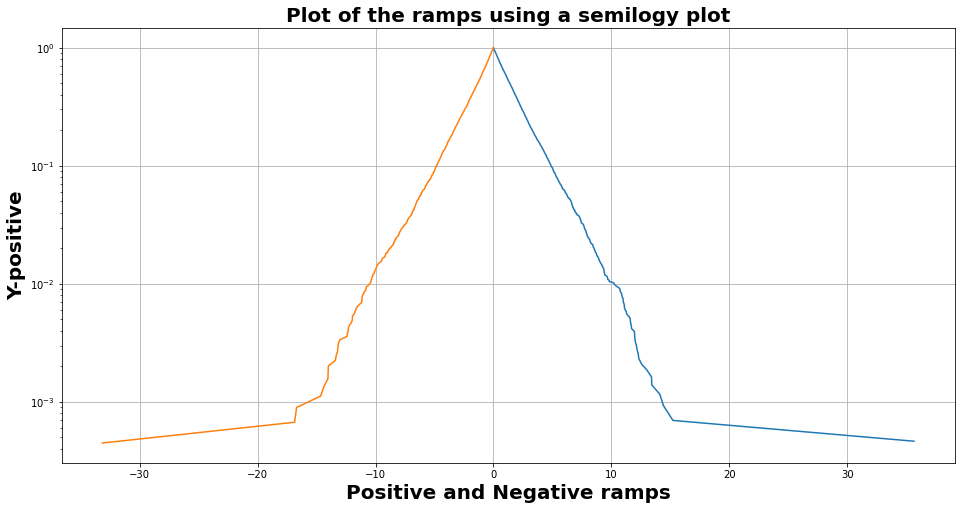

In [35]:
#figuring the size of the plot
plt.figure (figsize=(16,8))
#plotting of the graph using semilogy plot
plt.semilogy(sorted_positive_ramps["Change in generation"], 1-positive_Y)
plt.semilogy(-sorted_negative_ramps["Abs values-change in generation"],1-negative_Y)
#adding the title to the graph
plt.title('Plot of the ramps using a semilogy plot',color="black",fontsize=20,fontweight="bold")
#adding the x_label
plt.xlabel('Positive and Negative ramps',color="black",fontsize=20,fontweight="bold")
#adding the y_label
plt.ylabel('Y-positive',color="black",fontsize=20,fontweight="bold")
#adding gridlines
plt.grid()
#showing the graph
plt.show()

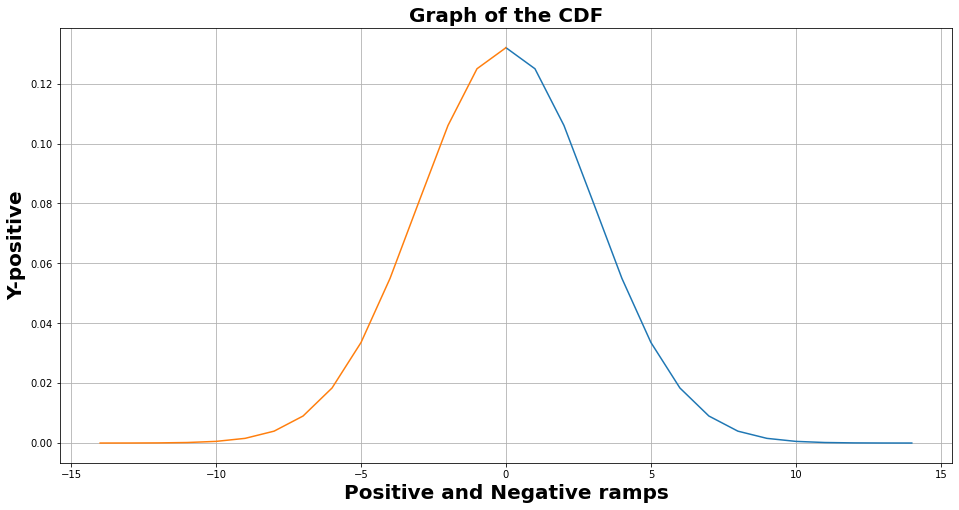

In [36]:
# plotting of the CDF
mu=0
sample = wind_data3["Change in generation"]
standard_deviation = statistics.stdev(wind_data3["Change in generation"])
standard_deviation
x = range(0,15)
plt.figure (figsize=(16,8))
plt.plot(x, stats.norm.pdf(x, mu, standard_deviation))
plt.plot([element * -1 for element in x], stats.norm.pdf(x, mu, standard_deviation))
#plotting of the graph
plt.title('Graph of the CDF',color="black",fontsize=20,fontweight="bold")
#adding the x_label
plt.xlabel('Positive and Negative ramps',color="black",fontsize=20,fontweight="bold")
#adding the y_label
plt.ylabel('Y-positive',color="black",fontsize=20,fontweight="bold")
#adding gridlines
plt.grid()
#showing the graph
plt.show()

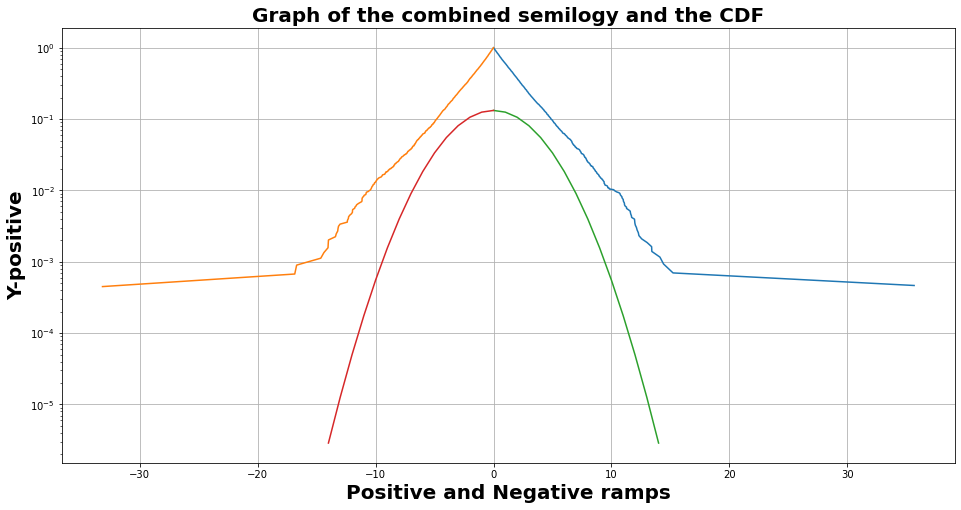

In [37]:
# figuring the size of the graph
plt.figure (figsize=(16,8))
#plotting of the graph of the combines semilogy and the CDF
plt.semilogy(sorted_positive_ramps["Change in generation"], 1-positive_Y)
plt.semilogy(-sorted_negative_ramps["Abs values-change in generation"],1-negative_Y)
plt.plot(x, stats.norm.pdf(x, mu, standard_deviation))
plt.plot([element * -1 for element in x], stats.norm.pdf(x, mu, standard_deviation))
#adding the title
plt.title('Graph of the combined semilogy and the CDF',color="black",fontsize=20,fontweight="bold")
#adding the x_label
plt.xlabel('Positive and Negative ramps',color="black",fontsize=20,fontweight="bold")
#adding the y_label
plt.ylabel('Y-positive',color="black",fontsize=20,fontweight="bold")
#add gridlines
plt.grid()
#showing the graph
plt.show()

# QUESTION 4

In [38]:
#wind generation using timescales using the shiftb code
time_scales_generation=[]
for i in range(1,25):
    daily_generation=((wind_data["Wind Generation"]-wind_data["Wind Generation"].shift(i))/(wind_data["Wind Generation"].max()))*100
    time_scales_generation.append(daily_generation)
#make the pdf of the generations
generations=pd.DataFrame(time_scales_generation).T
#filling the non values with zero
generations.fillna(0,inplace=True)
generations

,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,...,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.108514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-0.381348,-0.489862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,-0.855708,-1.237056,-1.345570,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.313139,-0.542568,-0.923916,-1.032430,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,-0.936318,-0.778198,1.075836,-1.540894,-5.611707,-4.985428,-2.560923,-1.280461,-2.846159,-6.120171,...,-7.236312,-7.800583,-7.595957,-7.267316,-7.614559,-9.567806,-9.174056,-7.366528,-4.349848,-4.005705
8756,1.085137,0.148819,0.306939,2.160972,-0.455757,-4.526570,-3.900291,-1.475786,-0.195325,-1.761022,...,-5.934148,-6.151175,-6.715446,-6.510820,-6.182179,-6.529423,-8.482669,-8.088919,-6.281391,-3.264711
8757,5.772927,6.858064,5.921746,6.079866,7.933900,5.317170,1.246357,1.872636,4.297141,5.577603,...,-0.778198,-0.161220,-0.378248,-0.942519,-0.737893,-0.409252,-0.756495,-2.709741,-2.315992,-0.508464
8758,2.917468,8.690395,9.775532,8.839214,8.997334,10.851367,8.234638,4.163825,4.790104,7.214609,...,3.664662,2.139270,2.756247,2.539220,1.974949,2.179575,2.508216,2.160972,0.207726,0.601476


In [39]:
#assigning the columns the names
hours=['h1','h2','h3','h4','h5','h6','h7','h8','h9','h10','h11','h12','h13','h14','h15','h16','h17','h18','h19','h20','h21','h22','h23','h24']
generations.columns=hours
generations

,h1,h2,h3,h4,h5,h6,h7,h8,h9,h10,...,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.108514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-0.381348,-0.489862,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,-0.855708,-1.237056,-1.345570,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.313139,-0.542568,-0.923916,-1.032430,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,-0.936318,-0.778198,1.075836,-1.540894,-5.611707,-4.985428,-2.560923,-1.280461,-2.846159,-6.120171,...,-7.236312,-7.800583,-7.595957,-7.267316,-7.614559,-9.567806,-9.174056,-7.366528,-4.349848,-4.005705
8756,1.085137,0.148819,0.306939,2.160972,-0.455757,-4.526570,-3.900291,-1.475786,-0.195325,-1.761022,...,-5.934148,-6.151175,-6.715446,-6.510820,-6.182179,-6.529423,-8.482669,-8.088919,-6.281391,-3.264711
8757,5.772927,6.858064,5.921746,6.079866,7.933900,5.317170,1.246357,1.872636,4.297141,5.577603,...,-0.778198,-0.161220,-0.378248,-0.942519,-0.737893,-0.409252,-0.756495,-2.709741,-2.315992,-0.508464
8758,2.917468,8.690395,9.775532,8.839214,8.997334,10.851367,8.234638,4.163825,4.790104,7.214609,...,3.664662,2.139270,2.756247,2.539220,1.974949,2.179575,2.508216,2.160972,0.207726,0.601476


In [40]:
# calculations of the percentiles
Percentiles=generations.quantile([0.01,0.05,0.95,0.99])
Percentiles_transp=Percentiles.T
Percentiles_transp

,0.01,0.05,0.95,0.99
h1,-8.716841,-4.815062,4.880015,8.479010
h2,-16.060179,-9.059496,9.192968,16.316798
h3,-22.552397,-12.898090,12.910182,22.088826
h4,-27.915421,-16.268060,16.290538,27.687760
h5,-32.825107,-19.332486,19.254356,32.462981
h6,-36.398183,-22.313667,22.045018,36.205959
h7,-39.360730,-24.445030,24.267533,39.665995
h8,-42.256247,-27.089663,26.147145,41.597538
h9,-44.676846,-29.287840,27.863366,44.366745
h10,-46.464687,-31.066689,29.746388,46.685310


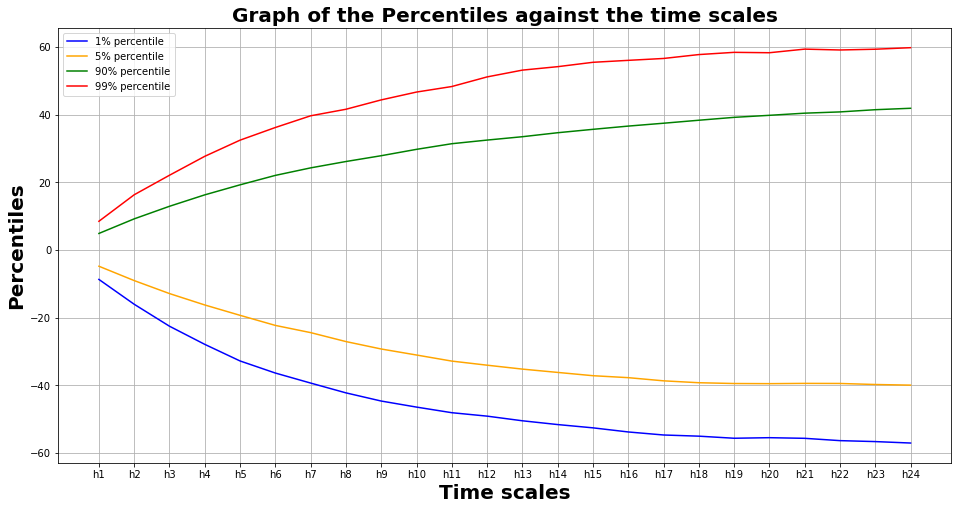

In [41]:
#figuring the size of the plot
plt.figure (figsize=(16,8))
#plotting of the percentiles
plt.plot(Percentiles_transp.index,Percentiles_transp[0.01],color='blue', label='1% percentile')
plt.plot(Percentiles_transp.index,Percentiles_transp[0.05],color='orange', label='5% percentile')
plt.plot(Percentiles_transp.index,Percentiles_transp[0.95],color='green', label='90% percentile')
plt.plot(Percentiles_transp.index,Percentiles_transp[0.99],color='red', label='99% percentile')
#adding title to the graph
plt.title('Graph of the Percentiles against the time scales',color="black",fontsize=20,fontweight="bold")
#adding x-label
plt.xlabel('Time scales',color="black",fontsize=20,fontweight="bold")
#adding the y_label
plt.ylabel('Percentiles',color="black",fontsize=20,fontweight="bold")
#adding legend
plt.legend()
#adding gridlines
plt.grid()
#showing the graph
plt.show()

# QUESTION 5

In [42]:
# we keep the wind data2
wind_data2

,Date,Time,Wind Generation,Change in generation
1,2014-01-01 02:00:00,2,1186.6,-0.139518
2,2014-01-01 03:00:00,3,1174.3,-0.412352
3,2014-01-01 04:00:00,4,1146.7,-0.886712
4,2014-01-01 05:00:00,5,1156.8,0.282136
5,2014-01-01 06:00:00,6,1189.7,0.989025
...,...,...,...,...
8755,2014-12-31 20:00:00,20,996.8,-0.967322
8756,2014-12-31 21:00:00,21,1031.8,1.054133
8757,2014-12-31 22:00:00,22,1218.0,5.741923
8758,2014-12-31 23:00:00,23,1312.1,2.886464


In [43]:
# calculation of the autocorrelation using the wind generation
autocorrelation=sm.tsa.acf(wind_data2['Wind Generation'],nlags=240)
autocorrelation

array([1.        , 0.99194168, 0.97259635, 0.94626189, 0.91599517,
       0.88370139, 0.85076521, 0.81829992, 0.78702714, 0.75737762,
       0.72965525, 0.70392066, 0.68004856, 0.65796888, 0.63768012,
       0.61926857, 0.60286594, 0.58848166, 0.57613357, 0.56566213,
       0.55678102, 0.54897868, 0.5413343 , 0.53276825, 0.52224839,
       0.50919157, 0.49420076, 0.47828309, 0.46224332, 0.44650854,
       0.43138   , 0.4170529 , 0.4036398 , 0.39130513, 0.38002356,
       0.36961585, 0.35979554, 0.35056   , 0.34198318, 0.33422265,
       0.32748535, 0.32183807, 0.31742221, 0.31432072, 0.3123028 ,
       0.31082684, 0.3093631 , 0.30736068, 0.30398574, 0.29879197,
       0.2919623 , 0.28424961, 0.27632077, 0.26870707, 0.26172618,
       0.25557006, 0.25044336, 0.24634119, 0.24308739, 0.24038062,
       0.23789009, 0.23551838, 0.23331617, 0.23151362, 0.23028232,
       0.22968379, 0.22979245, 0.23063303, 0.23206178, 0.23379058,
       0.23538313, 0.2362559 , 0.23568915, 0.23323731, 0.22921

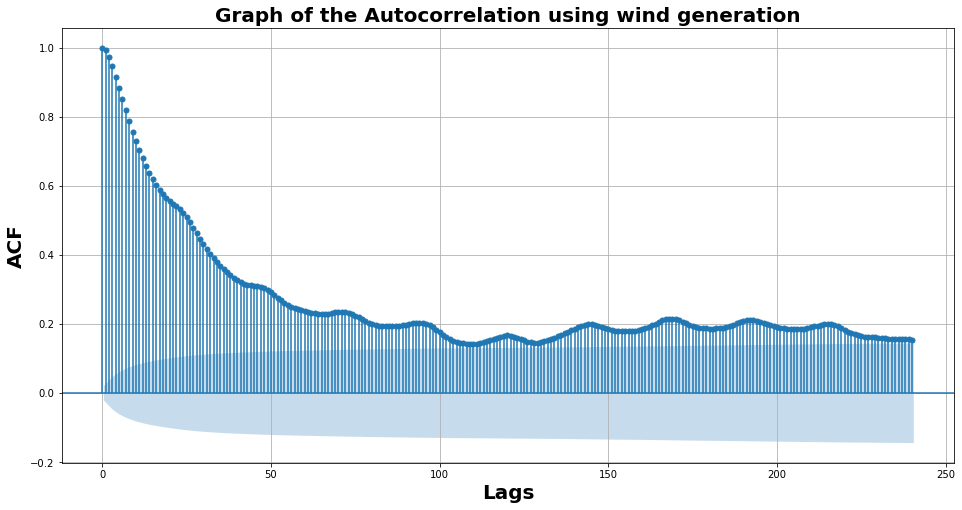

In [44]:
#figuring out the size of the graph
plt.rc("figure", figsize=(16,8))
#plotting of the acf
plot_acf(wind_data2["Wind Generation"],lags=240)
#add title to the graph
plt.title('Graph of the Autocorrelation using wind generation',color="black",fontsize=20,fontweight="bold")
#add labels for x and y
plt.xlabel('Lags',color="black",fontsize=20,fontweight="bold")
plt.ylabel('ACF',color="black",fontsize=20,fontweight="bold")
# add gridlines and showing the graph
plt.grid()
plt.show()

# QUESTION 6

In [45]:
#we keep the wind_data2
wind_data2

,Date,Time,Wind Generation,Change in generation
1,2014-01-01 02:00:00,2,1186.6,-0.139518
2,2014-01-01 03:00:00,3,1174.3,-0.412352
3,2014-01-01 04:00:00,4,1146.7,-0.886712
4,2014-01-01 05:00:00,5,1156.8,0.282136
5,2014-01-01 06:00:00,6,1189.7,0.989025
...,...,...,...,...
8755,2014-12-31 20:00:00,20,996.8,-0.967322
8756,2014-12-31 21:00:00,21,1031.8,1.054133
8757,2014-12-31 22:00:00,22,1218.0,5.741923
8758,2014-12-31 23:00:00,23,1312.1,2.886464


In [46]:
#calculate the autocorrelation using the change in wind geneeartion
autocorrelation=sm.tsa.acf(wind_data2['Change in generation'],nlags=240)
autocorrelation

array([ 1.00000000e+00,  7.04045607e-01,  4.36179997e-01,  2.46152725e-01,
        1.26411811e-01,  3.98890544e-02, -2.90144122e-02, -7.35407728e-02,
       -1.01639421e-01, -1.20740732e-01, -1.23252559e-01, -1.15504223e-01,
       -1.11521616e-01, -1.11763654e-01, -1.17585571e-01, -1.25511950e-01,
       -1.26091744e-01, -1.27831557e-01, -1.17226686e-01, -9.95542263e-02,
       -6.77612993e-02, -1.02642999e-02,  5.69326741e-02,  1.21242920e-01,
        1.57294589e-01,  1.20040012e-01,  5.79841197e-02,  8.25254791e-03,
       -1.88755709e-02, -3.74276701e-02, -4.97104756e-02, -5.68415922e-02,
       -6.69179078e-02, -6.48468912e-02, -5.35719969e-02, -3.64015897e-02,
       -3.59899603e-02, -4.06410656e-02, -5.03478701e-02, -6.28681474e-02,
       -6.77481176e-02, -7.66737079e-02, -8.17890372e-02, -6.73262692e-02,
       -3.34811447e-02, -2.03079578e-04,  3.38067342e-02,  8.52294305e-02,
        1.13025690e-01,  1.01998812e-01,  5.50971489e-02,  1.29435361e-02,
       -2.00795930e-02, -

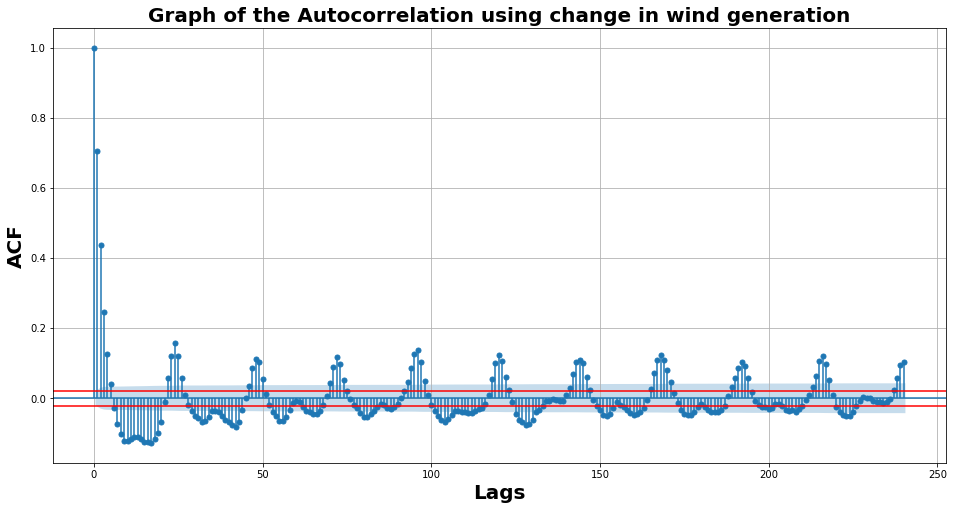

In [132]:
#figuring the size of the graph
plt.rc("figure", figsize=(16,8))
#plotting of the acf for the change in wind generation
plot_acf(wind_data2["Change in generation"],lags=240)
#settign of the boundaries
num1=+1.96/(math.sqrt(len(wind_data2)))
num2=-1.96/(math.sqrt(len(wind_data2)))
# showing the horizontal lines
plt.axhline(num1,color='r',label='ACF < 0.05')
plt.axhline(num2,color='r',label='ACF < 0.05')
#add title to the graph
plt.title('Graph of the Autocorrelation using change in wind generation',color="black",fontsize=20,fontweight="bold")
#adding labels
plt.xlabel('Lags',color="black",fontsize=20,fontweight="bold")
plt.ylabel('ACF',color="black",fontsize=20,fontweight="bold")
#add gridlines and showing the graph
plt.grid()
plt.show()

# QUESTION 7

In [48]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [49]:
#calculation of the variance ratio
variance_ratio = VarianceRatio(wind_data2['Wind Generation'], lags=240)
variance_ratio

Test Statistic,-2.558
P-value,0.011
Lags,240


In [99]:
# the p_value for the variance ratio
variance_ratio.pvalue

0.010536253517002159

In [102]:
# calculation of the ADF
F = ADF(wind_data2['Wind Generation'])
print(F)

   Augmented Dickey-Fuller Results   
Test Statistic                 -9.498
P-value                         0.000
Lags                               26
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


# QUESTION 8

In [51]:
# Python program to calculate
# simple moving averages using pandas
MAVs=[] 
      
arr = wind_data["Wind Generation"]
window_size = range(1,25)
  
# Convert array of integers to pandas series
numbers_series = pd.Series(arr)
  
# Get the window of series
# of observations of specified window size

for i in window_size:
    windows = numbers_series.rolling(i)
  
    # Create a series of moving
# averages of each window
    moving_averages = windows.mean()
    MAVs.append(moving_averages)
MAVs

[0       1190.1
 1       1186.6
 2       1174.3
 3       1146.7
 4       1156.8
          ...  
 8755     996.8
 8756    1031.8
 8757    1218.0
 8758    1312.1
 8759    1424.8
 Name: Wind Generation, Length: 8760, dtype: float64,
 0           NaN
 1       1188.35
 2       1180.45
 3       1160.50
 4       1151.75
          ...   
 8755    1011.90
 8756    1014.30
 8757    1124.90
 8758    1265.05
 8759    1368.45
 Name: Wind Generation, Length: 8760, dtype: float64,
 0               NaN
 1               NaN
 2       1183.666667
 3       1169.200000
 4       1159.266667
            ...     
 8755    1015.233333
 8756    1018.533333
 8757    1082.200000
 8758    1187.300000
 8759    1318.300000
 Name: Wind Generation, Length: 8760, dtype: float64,
 0            NaN
 1            NaN
 2            NaN
 3       1174.425
 4       1166.100
           ...   
 8755    1001.950
 8756    1019.375
 8757    1068.400
 8758    1139.675
 8759    1246.675
 Name: Wind Generation, Length: 8760, dtype: f

In [52]:
# generate the dataframe for the moving averages
MAVs_df=pd.DataFrame(MAVs)
#filling the non values with zero
MAVs_df.fillna(0,inplace=True)
#finding of the transpose for the dataframe
MAVs_Transp=MAVs_df.T
MAVs_Transp

,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,...,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation
0,1190.1,0.00,0.000000,0.000,0.00,0.000000,0.000000,0.0000,0.000000,0.00,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
1,1186.6,1188.35,0.000000,0.000,0.00,0.000000,0.000000,0.0000,0.000000,0.00,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,1174.3,1180.45,1183.666667,0.000,0.00,0.000000,0.000000,0.0000,0.000000,0.00,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,1146.7,1160.50,1169.200000,1174.425,0.00,0.000000,0.000000,0.0000,0.000000,0.00,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
4,1156.8,1151.75,1159.266667,1166.100,1170.90,0.000000,0.000000,0.0000,0.000000,0.00,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,996.8,1011.90,1015.233333,1001.950,1010.86,1038.683333,1055.671429,1058.6375,1056.355556,1059.58,...,1111.753333,1119.15625,1126.758824,1133.150000,1138.310526,1143.515,1151.223810,1157.654545,1160.991304,1159.995833
8756,1031.8,1014.30,1018.533333,1019.375,1007.92,1014.350000,1037.700000,1052.6875,1055.655556,1053.90,...,1098.993333,1106.75625,1114.017647,1121.483333,1127.815789,1132.985,1138.195238,1145.795455,1152.182609,1155.608333
8757,1218.0,1124.90,1082.200000,1068.400,1059.10,1042.933333,1043.442857,1060.2375,1071.055556,1071.89,...,1097.320000,1106.43125,1113.300000,1119.794444,1126.563158,1132.325,1137.033333,1141.822727,1148.934783,1154.925000
8758,1312.1,1265.05,1187.300000,1139.675,1117.14,1101.266667,1081.385714,1077.0250,1088.222222,1095.16,...,1105.200000,1110.74375,1118.529412,1124.344444,1129.915789,1135.840,1140.885714,1144.990909,1149.226087,1155.733333


In [53]:
# generating the columns names
window_size=['n1','n2','n3','n4','n5','n6','n7','n8','n9','n10','n11','n12','n13','n14','n15','n16','n17','n18','n19','n20','n21','n22','n23','n24']

In [54]:
# assigning the names to the columns
MAVs_Transp.columns=window_size
MAVs_Transp

,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,...,n15,n16,n17,n18,n19,n20,n21,n22,n23,n24
0,1190.1,0.00,0.000000,0.000,0.00,0.000000,0.000000,0.0000,0.000000,0.00,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
1,1186.6,1188.35,0.000000,0.000,0.00,0.000000,0.000000,0.0000,0.000000,0.00,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,1174.3,1180.45,1183.666667,0.000,0.00,0.000000,0.000000,0.0000,0.000000,0.00,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,1146.7,1160.50,1169.200000,1174.425,0.00,0.000000,0.000000,0.0000,0.000000,0.00,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
4,1156.8,1151.75,1159.266667,1166.100,1170.90,0.000000,0.000000,0.0000,0.000000,0.00,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,996.8,1011.90,1015.233333,1001.950,1010.86,1038.683333,1055.671429,1058.6375,1056.355556,1059.58,...,1111.753333,1119.15625,1126.758824,1133.150000,1138.310526,1143.515,1151.223810,1157.654545,1160.991304,1159.995833
8756,1031.8,1014.30,1018.533333,1019.375,1007.92,1014.350000,1037.700000,1052.6875,1055.655556,1053.90,...,1098.993333,1106.75625,1114.017647,1121.483333,1127.815789,1132.985,1138.195238,1145.795455,1152.182609,1155.608333
8757,1218.0,1124.90,1082.200000,1068.400,1059.10,1042.933333,1043.442857,1060.2375,1071.055556,1071.89,...,1097.320000,1106.43125,1113.300000,1119.794444,1126.563158,1132.325,1137.033333,1141.822727,1148.934783,1154.925000
8758,1312.1,1265.05,1187.300000,1139.675,1117.14,1101.266667,1081.385714,1077.0250,1088.222222,1095.16,...,1105.200000,1110.74375,1118.529412,1124.344444,1129.915789,1135.840,1140.885714,1144.990909,1149.226087,1155.733333


In [97]:
#calculation of the mean absolute error
errors=[]
for i in range(0,24):
    error = mae(wind_data["Wind Generation"],(MAVs_Transp).iloc[:,i])
    errors.append(error)

In [56]:
errors

[0.0,
 33.382471461187215,
 62.86293378995434,
 89.39071347031964,
 113.50287671232876,
 135.5138926940639,
 155.78285225048924,
 174.58115724885846,
 191.8615474378488,
 207.69734132420092,
 222.12505188875053,
 235.40405917047184,
 247.84681067790657,
 259.39654843444225,
 270.06914992389653,
 279.9369941495434,
 289.12357238785927,
 297.7328570522577,
 305.64494592645997,
 312.8542305936074,
 319.4559795607741,
 325.48077314238276,
 331.0720274965257,
 336.4262685502283]

# QUESTION 9

In [58]:
for i in range (1,25):
    wind_data["Wind Generation"].shift(i)

In [139]:
persistance=[]
pe_tance=[]

for j in range(1,25):
    arr = wind_data["Wind Generation"].shift(j)
    pe_tance.append(arr)
p=pd.DataFrame(pe_tance).T
p.fillna(0,inplace=True)
p

,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,...,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation,Wind Generation
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1190.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1186.6,1190.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1174.3,1186.6,1190.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1146.7,1174.3,1186.6,1190.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1027.0,1021.9,962.1,1046.5,1177.8,1157.6,1079.4,1038.1,1088.6,1194.2,...,1230.2,1248.4,1241.8,1231.2,1242.4,1305.4,1292.7,1234.4,1137.1,1126.0
8756,996.8,1027.0,1021.9,962.1,1046.5,1177.8,1157.6,1079.4,1038.1,1088.6,...,1223.2,1230.2,1248.4,1241.8,1231.2,1242.4,1305.4,1292.7,1234.4,1137.1
8757,1031.8,996.8,1027.0,1021.9,962.1,1046.5,1177.8,1157.6,1079.4,1038.1,...,1243.1,1223.2,1230.2,1248.4,1241.8,1231.2,1242.4,1305.4,1292.7,1234.4
8758,1218.0,1031.8,996.8,1027.0,1021.9,962.1,1046.5,1177.8,1157.6,1079.4,...,1193.9,1243.1,1223.2,1230.2,1248.4,1241.8,1231.2,1242.4,1305.4,1292.7


In [140]:
#calculation of the persistance
errors_pers=[]
for i in range(0,24):
    error = mae(wind_data["Wind Generation"],(p).iloc[:,i])
    errors_pers.append(error)
errors_pers

[66.62908675799086,
 124.43453196347032,
 175.14756849315071,
 219.9664497716895,
 260.05316210045663,
 296.1855365296804,
 328.33710045662104,
 357.1499429223744,
 382.9671461187214,
 406.09070776255714,
 426.5038356164383,
 444.8217351598174,
 461.0433447488585,
 475.89309360730596,
 489.6733219178082,
 501.832397260274,
 512.2439155251142,
 521.2381506849315,
 528.7853881278539,
 535.1028310502282,
 540.6013470319634,
 545.7994520547945,
 551.8389269406392,
 559.1393835616439]

In [91]:
# mean absolute error as percentage benchmark
MAE_percentage = []
for i in range(len(errors_pers)):
    percentages=(errors_pers[i]/max(errors_pers))*100
    MAE_percentage.append(percentages)
MAE_percentage

[11.916364455240553,
 22.254653423058635,
 31.32449146713363,
 39.340181757638376,
 46.50954122457846,
 52.97168205949253,
 58.72186973579954,
 63.874939491361985,
 68.4922503006802,
 72.62781333266369,
 76.27862535807536,
 79.5547135897246,
 82.45588815655829,
 85.11171053198399,
 87.57625313363798,
 89.7508585540278,
 91.6129198880945,
 93.22150540795633,
 94.57130076575201,
 95.70115194563725,
 96.68454108676882,
 97.61420284475835,
 98.69434047473071,
 100.0]

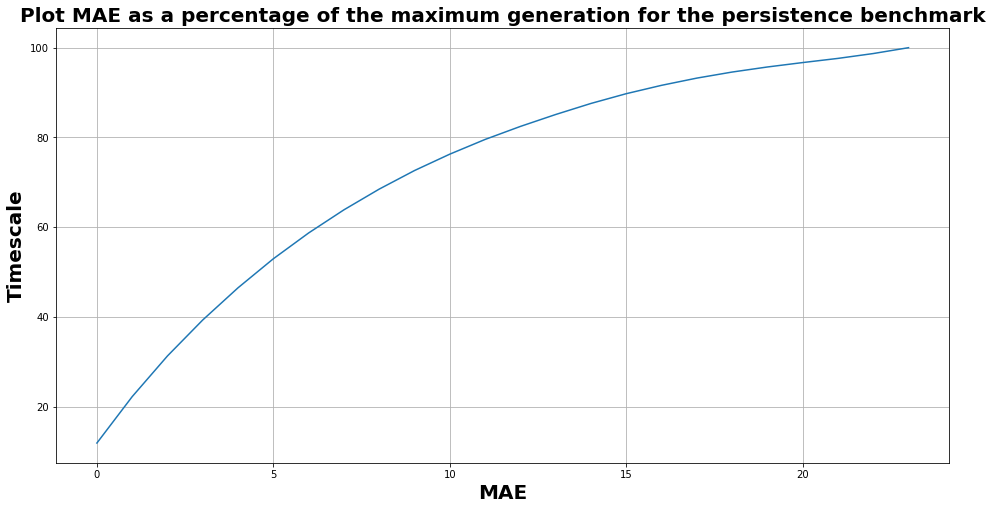

In [94]:
#figuring the size of the graph
plt.rc("figure", figsize=(16,8))
#ploting of the MAE as a percentage of the maximum generation
plt.plot(MAE_percentage)
plt.plot(len(MAE_percentage))
#adding title and labels 
plt.title('Plot MAE as a percentage of the maximum generation for the persistence benchmark',color="black",fontsize=20,fontweight="bold")
plt.xlabel('MAE',color="black",fontsize=20,fontweight="bold")
plt.ylabel('Timescale',color="black",fontsize=20,fontweight="bold")
#add gridlines and showing the graph
plt.grid()
plt.show()

# QUESTION 10

In [123]:
#Find parameters it takes (p, d, q)
p = q = range(1, 5)
d = 1
for i in p:
    for j in q:
        #AutoRegressive Integrated Moving Average (ARIMA) model
        mod = ARIMA(wind_data["Wind Generation"],order=(i,d,j))
        results = mod.fit()
        print('p:{} q:{}'.format( i,j))
        print('- AIC:{} - BIC:{}'.format( results.aic,results.bic))

p:1 q:1
- AIC:98979.61517258997 - BIC:99007.92652067862
p:1 q:2
- AIC:98966.01291330518 - BIC:99001.402098416
p:1 q:3
- AIC:98967.70461801608 - BIC:99010.17164014906
p:1 q:4
- AIC:98967.26843680524 - BIC:99016.81329596038
p:2 q:1
- AIC:98855.04467372017 - BIC:98890.43385883099
p:2 q:2
- AIC:98785.83633762335 - BIC:98828.30335975632
p:2 q:3
- AIC:98784.35927360562 - BIC:98833.90413276076
p:2 q:4
- AIC:98784.87158467267 - BIC:98841.49428084998
p:3 q:1
- AIC:98783.3892256722 - BIC:98825.85624780518
p:3 q:2
- AIC:98785.23069604157 - BIC:98834.77555519671
p:3 q:3
- AIC:98785.29545288862 - BIC:98841.91814906592
p:3 q:4
- AIC:98788.05260494823 - BIC:98851.7531381477
p:4 q:1
- AIC:98785.18769071798 - BIC:98834.73254987312
p:4 q:2
- AIC:98786.31940830333 - BIC:98842.94210448064
p:4 q:3
- AIC:98785.65715552024 - BIC:98849.35768871971
p:4 q:4
- AIC:98776.47210715484 - BIC:98847.25047737647
